In [1]:
import sys
sys.path.append('my_package')
%matplotlib inline

## MOOC Econometrics- Test Exercise 1
**Goals and skills being used:**
• Get hands-on experience with performing simple regressions.
• Get feeling for consequences of violations of regression assumptions.
• Obtain some experience with how to diagnose that an assumption is violated.

**Questions**
This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates
assumptions A3 and A4, which state that all error terms εi are drawn from one and the same distribution with mean zero and fixed variance σ

The dataset contains twenty weekly observations on sales and advertising of a department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks
was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis.


#### (a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?
**ans**：see the scatter plot below. The regression line would be misleading because of the outlier

   Observ.  Advert.  Sales
0        1       12     24
1        2       12     27
2        3        9     25
3        4       11     27
4        5        6     23
        Observ.    Advert.      Sales
count  20.00000  20.000000  20.000000
mean   10.50000  10.250000  26.300000
std     5.91608   2.917732   5.759203
min     1.00000   6.000000  23.000000
25%     5.75000   8.000000  24.000000
50%    10.50000  11.000000  25.000000
75%    15.25000  12.000000  26.250000
max    20.00000  16.000000  50.000000


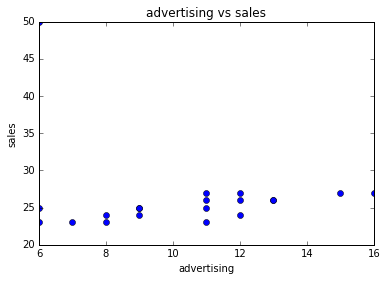

In [2]:
import xforex.BackTesting.econometrics_tools
from xforex.BackTesting.econometrics_tools import Econometrics_Tool
import pandas as pd
import matplotlib.pyplot as plt


dat = pd.read_csv('/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3/test/samle_data/csv_sample/TestExer1-sales-round1.csv',
                      sep='\t')
print dat.head()
print dat.describe()

Econometrics_Tool().plot_scatter(dat['Advert.'], dat['Sales'],'advertising', 'sales')

#### (b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertisingas explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?
**ans**: a = 29.6269, b = -0.3246; t value for b = 0.459, not significantly different from 0

#### (c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?
**ans**: see figure below.Residuals are not normally distributed due to the outlier data point


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.5002
Date:                Wed, 07 Sep 2016   Prob (F-statistic):              0.488
Time:                        09:55:25   Log-Likelihood:                -62.608
No. Observations:                  20   AIC:                             129.2
Df Residuals:                      18   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         29.6269      4.882      6.069      0.0

/Users/CJ/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


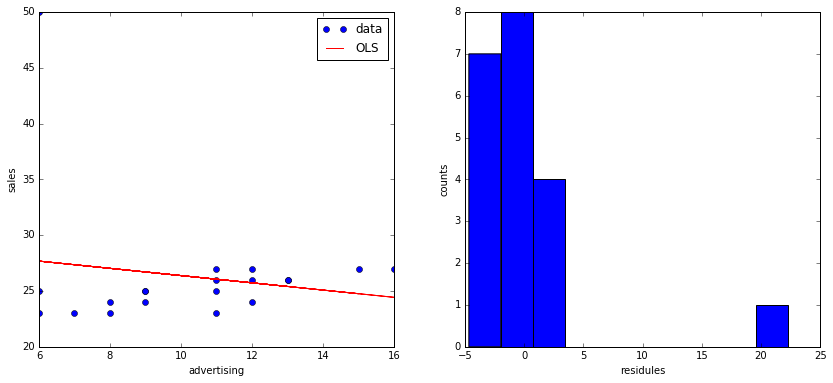

In [3]:
Econometrics_Tool().plot_linear_fit(dat['Advert.'].reshape(len(dat),1), \
                                    dat['Sales'].reshape(len(dat),1),'advertising', 'sales')

#### (d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?
**ans**: remove outlinears

#### (e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and
b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and t-value of b. Is b significantly different from 0?

**ans**: the t value of b after remove outliers is 4.252, significatnt different from 0.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     18.08
Date:                Wed, 07 Sep 2016   Prob (F-statistic):           0.000538
Time:                        09:58:30   Log-Likelihood:                -26.897
No. Observations:                  19   AIC:                             57.79
Df Residuals:                      17   BIC:                             59.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.1250      0.955     22.124      0.0

/Users/CJ/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


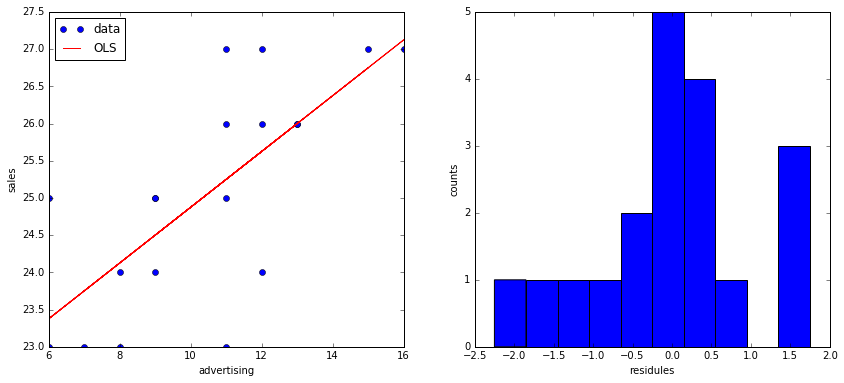

In [5]:
dat = dat[dat['Sales']<40]
dat.describe()
Econometrics_Tool().plot_linear_fit(dat['Advert.'].reshape(len(dat),1), dat['Sales'].reshape(len(dat),1),'advertising', 'sales')

#### (f) Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned from these results.
**ans**: Removing the outlier data point significantly reduced the standard error, but the
model is still not very descriptive. This is probably due to the fact that there are
other external factors that are influencing sales.
